In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#list_names = ['User1', 'User3','User4', 'User5', 'User6']#, 'User7']
#list_names = ['User1', 'User3', 'User4', 'User5', 'User6', 'User7', 'User8']#,'User4', 'User5', 'User6']#, 'User7']
list_names = ['User3', 'User3']

nbUsers = len(list_names)

list_beta = [1.05]
list_gamma = [0]

nbBetaGamma = len(list_beta)

addword = 'AllTimes-3sBIndexThumb'

In [2]:
nbUsers

2

In [3]:
boneNames = []
bones = pd.Series()
bones = pd.read_csv('./BoneNames.csv')
bones = bones.transpose()
bones = bones.drop(bones.index[0])
for i in range(0, 19):
    boneNames.append('R-' + bones.iloc[0, i])
for i in range(0, 19):
    boneNames.append('L-' + bones.iloc[0, i])
    
for i in range(0, len(boneNames)):
    txt = boneNames[i]
    boneNames[i] = txt.replace('_CapsuleCollider', '')

In [4]:
globalAnalysis = pd.DataFrame()
analysisPerObj = pd.DataFrame()
objects = ['obj0', 'obj1', 'obj2', 'obj3', 'obj4', 'obj5', 'obj6', 'Cube', 'Cylinder']
analysisPerTask = pd.DataFrame()
tasks = ['Touch', 'Raise', 'Pull', 'Push', 'Push Down']
analysisPerScale = pd.DataFrame()
scales = ['small', 'medium', 'large']

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-'+list_names[j]+ addword+ '.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        globalAnalysis = pd.concat([betaGammaSummary, globalAnalysis], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perObject-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')


        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerObj = pd.concat([betaGammaSummary, analysisPerObj], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perTask-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerTask = pd.concat([betaGammaSummary, analysisPerTask], axis = 0, sort = True)


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perScale-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisPerScale = pd.concat([betaGammaSummary, analysisPerScale], axis = 0, sort = True)




In [5]:
analysisBoneDistPerScale = pd.DataFrame()
analysisBoneDistPerObj = pd.DataFrame()
analysisBoneDistPerTask = pd.DataFrame()


for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perObject-BoneDist-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')


        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary = pd.merge(betaGammaTime, betaGammaSuccess, how = 'inner', on = 'Tolerance')
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerObj = pd.concat([betaGammaSummary, analysisBoneDistPerObj], axis = 0, sort = True)

    
for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perTask-BoneDist-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerTask = pd.concat([betaGammaSummary, analysisBoneDistPerTask], axis = 0, sort = True)

    
for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-perScale-BoneDist-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Tolerance'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Tolerance'])
        betaGammaSummary = betaGammaTime
        betaGammaSummary.index = betaGammaSummary['Tolerance']
        betaGammaSummary['Beta'] = float(beta)
        betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        analysisBoneDistPerScale = pd.concat([betaGammaSummary, analysisBoneDistPerScale], axis = 0, sort = True)

    

In [6]:
#This is the mean over all the users
meanUsers = pd.DataFrame()
for paramB in range(0, nbBetaGamma):
    for tol in range(0, 50):
        meanUsersBeta = pd.DataFrame()
        cond = (globalAnalysis['Tolerance'] == globalAnalysis['Tolerance'].iloc[tol]) & (globalAnalysis['Beta'] == list_beta[paramB]) & (globalAnalysis['Gamma'] == list_gamma[paramB])
        meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        for j in range(6, 10, 3):
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Phalanx.'+str(j)] = globalAnalysis[cond]['Phalanx.'+str(j)].mean()
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'BoneDist.'+str(j)] = globalAnalysis[cond]['BoneDist.'+str(j)].mean()
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Speed.'+str(j)] = abs(globalAnalysis[cond]['Speed.'+str(j)].mean())

            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
            meanUsersBeta.loc[globalAnalysis['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        meanUsers = pd.concat([meanUsersBeta, meanUsers], axis = 0, sort = True)
            

In [7]:
meanUsers.head()

Beta  BoneDist.6  BoneDist.9  Gamma  Phalanx.6  Phalanx.9    Speed.6  \
580  1.05   34.843155   49.659799    0.0  14.338129  22.114526  55.385777   
570  1.05   32.573199   48.834069    0.0  12.957408  17.856136  59.868898   
560  1.05   32.217109   45.961815    0.0  15.255877  17.722327  49.864988   
550  1.05   31.935119   49.930049    0.0  16.870618  16.735339   5.082500   
540  1.05   34.120988   43.630870    0.0  17.394004  16.567521  54.915500   

        Speed.9  
580   18.496223  
570  111.373797  
560   27.780639  
550    8.473225  
540   43.123515

In [8]:
meanPerObj = pd.DataFrame()
meanPerTask = pd.DataFrame()
meanPerScale = pd.DataFrame()


for paramB in range(0, nbBetaGamma):
    for tol in range(0, 50):
        meanPerObjB = pd.DataFrame()
        meanPerScaleB = pd.DataFrame()
        meanPerTaskB = pd.DataFrame()
        
        cond = (analysisPerScale['Tolerance'] == analysisPerScale['Tolerance'].iloc[tol]) & (analysisPerScale['Beta'] == list_beta[paramB]) & (analysisPerScale['Gamma'] == list_gamma[paramB])
        meanPerObjB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerObjB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    
        
        meanPerScaleB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerScaleB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    

        meanPerTaskB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Beta'] = list_beta[paramB]
        meanPerTaskB.loc[analysisPerObj['Tolerance'].iloc[tol], 'Gamma'] = list_gamma[paramB]    

        for j in range(0, len(objects)):
            meanPerObjB.loc[globalAnalysis['Tolerance'].iloc[tol], objects[j]] = analysisPerObj[cond][objects[j]].mean()
        meanPerObj = pd.concat([meanPerObjB, meanPerObj], axis = 0, sort = True)
        
        for j in range(0, len(tasks)):
            meanPerTaskB.loc[globalAnalysis['Tolerance'].iloc[tol], tasks[j]] = analysisPerTask[cond][tasks[j]].mean()
        meanPerTask = pd.concat([meanPerTaskB, meanPerTask], axis = 0, sort = True)
        
        for j in range(0, len(scales)):
            meanPerScaleB.loc[globalAnalysis['Tolerance'].iloc[tol], scales[j]] = analysisPerScale[cond][scales[j]].mean()
        meanPerScale = pd.concat([meanPerScaleB, meanPerScale], axis = 0, sort = True)
        
        
           

In [9]:
allConfig = pd.DataFrame()

for j in range(0, int(nbUsers)):    
    for i in range(0, int(nbBetaGamma)):
        gamma = list_gamma[i]
        beta = list_beta[i]
        betaGammaTime = pd.DataFrame()
        betaGammaTime = pd.read_csv('./Analysis/TimeTolerance/'+ list_names[j] + '/NoParam/NoParam-G-'+str(gamma)+'B-'+str(beta)+'-AllConfigTypes-'+list_names[j]+ addword+'.csv', sep = ";", decimal = '.')

        betaGammaTime['Config'] = betaGammaTime['Unnamed: 0']
        del betaGammaTime['Unnamed: 0']

        betaGammaSummary = pd.DataFrame(index = betaGammaTime['Config'])
        betaGammaSummary = betaGammaTime
        #betaGammaSummary.index = betaGammaSummary['Tolerance']
        #betaGammaSummary['Beta'] = float(beta)
        #betaGammaSummary['Gamma'] = float(gamma)
        betaGammaSummary['User'] = list_names[j]

        allConfig = pd.concat([betaGammaSummary, allConfig], axis = 0, sort = True)

In [10]:
allConfig.head()

Config  DistBoneInTolTime.0  DistBoneInTolTime.100  DistBoneInTolTime.1000  \
0       0                  0.0                1.02580                57.79045   
1       1                  0.0                7.49410                 8.41760   
2       2                  0.0                2.93300                27.62745   
3       3                  0.0                3.63005                61.80440   
4       4                  0.0                6.44150               144.20440   

   DistBoneInTolTime.1010  DistBoneInTolTime.1020  DistBoneInTolTime.1030  \
0                64.90725                64.90725               126.29510   
1                 8.41760                 8.41760                 6.20205   
2                27.62745                27.32670                27.32670   
3                44.55445                42.92010                42.92010   
4               122.18020               122.18020               122.18020   

   DistBoneInTolTime.1040  DistBoneInTolTime.1050  DistBoneInTolTime.1060  \
0                64.97170                64.97170                70.72980   
1                 6.20205                 6.20205                 6.20205   
2                20.42390                26.66550                26.66550   
3                42.92010                42.92010                43.90030   
4               122.18020               122.18020                91.60290   

   ...  Speed.920  Speed.930  Speed.940  Speed.950  Speed.960  Speed.970  \
0  ...        NaN        NaN        NaN        NaN        NaN        NaN   
1  ...        NaN    -69.393    -69.393    -69.393        NaN        NaN   
2  ...        NaN        NaN        NaN        NaN        NaN        NaN   
3  ...        NaN        NaN        NaN        NaN        NaN        NaN   
4  ...        NaN        NaN        NaN        NaN -43.469903 -43.469903   

   Speed.980  Speed.990       Task   User  
0        NaN        NaN      Touch  User3  
1        NaN        NaN      Raise  User3  
2        NaN        NaN       Pull  User3  
3        NaN        NaN       Push  User3  
4 -43.469903        NaN  Push Down  User3  

[5 rows x 1190 columns]

In [11]:
#Mean per config, All users?

In [12]:
meanPerScale.tail()

Beta  Gamma     large    medium     small
130  1.05    0.0  1.151747  1.455815  3.201775
120  1.05    0.0  1.143953  1.491230  1.831198
110  1.05    0.0  0.858275  1.290342  1.717816
100  1.05    0.0  1.215800  1.024948  1.605939
0    1.05    0.0  0.920027  0.570571  1.569567

In [13]:
globalAnalysis

Beta  BoneDist.6  BoneDist.9  DistToPred.6  DistToPred.9  Gamma  \
Tolerance                                                                    
0          1.05    0.000000    0.000000     12.863964      8.098809    0.0   
100        1.05    3.598099    3.640417     12.960469      8.714620    0.0   
110        1.05    3.901837    4.772397     12.751503      8.928971    0.0   
120        1.05    4.787195    6.374358     13.038669      8.772558    0.0   
130        1.05    5.204578    6.199926     13.470492      9.585480    0.0   
140        1.05    5.966860    7.509553     14.575003     10.330719    0.0   
150        1.05    6.329266    7.590793     14.639485     10.853112    0.0   
160        1.05    6.567128    6.954743     14.351008     11.353845    0.0   
170        1.05    6.584632    7.839220     14.454144     11.635794    0.0   
180        1.05    7.203099   10.374841     14.131546     11.490241    0.0   
190        1.05    7.590074   10.142078     13.953204     11.429165    0.0   
200        1.05    7.560177   10.543360     14.285559     11.700078    0.0   
210        1.05    7.650409   11.347986     14.651423     13.766462    0.0   
220        1.05    7.821764   13.635179     14.595318     15.172912    0.0   
230        1.05    8.195857   13.885783     15.539358     16.398444    0.0   
240        1.05    9.519047   13.624924     15.296673     17.044598    0.0   
250        1.05   10.020286   14.469186     14.738957     16.679869    0.0   
260        1.05   10.496068   14.499673     15.187293     15.513070    0.0   
270        1.05   12.184838   16.573308     15.628844     16.728145    0.0   
280        1.05   11.861515   16.730276     15.639285     17.069747    0.0   
290        1.05   11.946486   19.121613     17.130204     18.588070    0.0   
300        1.05   12.028989   20.575601     18.364142     21.600677    0.0   
310        1.05   12.227345   21.824376     18.265770     23.344340    0.0   
320        1.05   12.406237   20.163111     27.804373     23.401889    0.0   
330        1.05   13.192617   22.452631     27.960934     32.767251    0.0   
340        1.05   14.045906   25.307916     27.783644     32.041526    0.0   
350        1.05   16.055949   28.194567     27.612186     33.347538    0.0   
360        1.05   16.469890   29.093403     28.670455     34.689963    0.0   
370        1.05   17.332872   31.100004     22.432925     37.103720    0.0   
380        1.05   17.742191   29.808649     28.372344     29.496662    0.0   
...         ...         ...         ...           ...           ...    ...   
2750       1.05  149.416695  151.714012    298.031484    358.804688    0.0   
2760       1.05  146.212905  128.753768    316.349145    333.951415    0.0   
2770       1.05  140.775805  145.973440    300.281591    307.800324    0.0   
2780       1.05  140.410771  124.503012    291.410965    285.070875    0.0   
2790       1.05  137.122751  137.345692    295.057197    288.921478    0.0   
2800       1.05  126.600571  150.286274    287.563506    291.532815    0.0   
2810       1.05  132.535495  169.772915    265.026183    305.995868    0.0   
2820       1.05  148.945758  190.484785    283.751246    344.167905    0.0   
2830       1.05  132.541784  191.908389    289.290717    333.495023    0.0   
2840       1.05  143.527503  178.288179    305.568221    337.796876    0.0   
2850       1.05  154.058473  157.313904    316.496507    346.182017    0.0   
2860       1.05  136.032090  149.841068    317.455291    322.657505    0.0   
2870       1.05  123.428315  117.353164    302.639985    281.723860    0.0   
2880       1.05  125.950168  141.250517    282.202326    294.678043    0.0   
2890       1.05  112.964349  142.579786    269.254771    289.609085    0.0   
2900       1.05  115.780237  163.017280    260.902702    304.321577    0.0   
2910       1.05  133.630267  172.182817    285.142268    366.833579    0.0   
2920       1.05  141.315509  182.052675    296.321393    335.660835    0.0   
2930       1.05  138.045876  181.

In [14]:
analysisPerTask.head()

Beta  Gamma      Pull      Push  Push Down     Raise  Tolerance  \
Tolerance                                                                    
0          1.05    0.0  0.950061  0.851606   0.921843  0.972747          0   
100        1.05    0.0  0.788787  0.740793   0.991545  1.996508        100   
110        1.05    0.0  0.891259  0.632517   1.055307  1.385704        110   
120        1.05    0.0  0.508269  0.894787   0.991869  2.540077        120   
130        1.05    0.0  2.729705  1.219230   0.889272  1.916304        130   

              Touch   User  
Tolerance                   
0          1.360857  User3  
100        1.919968  User3  
110        2.335063  User3  
120        2.504838  User3  
130        2.679595  User3

In [15]:
globalAnalysis.iloc[1]

Beta                  1.05
BoneDist.6          3.5981
BoneDist.9         3.64042
DistToPred.6       12.9605
DistToPred.9       8.71462
Gamma                    0
GraspDuration.6        NaN
GraspDuration.9        NaN
Phalanx.6          1.05522
Phalanx.9          1.31301
Speed.6           -2.29836
Speed.9            41.6368
Tolerance              100
User                 User3
Name: 100, dtype: object

In [16]:
tol = 0
for user in range(0, nbUsers):
    cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
    nbPhal = 0
    totalFingerTips = 0
    totalBones = 0
    for fingertip in range(6, 10, 3):
        if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
            nbPhal = nbPhal + 1
            totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
            totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()

    globalAnalysis.loc[tol, 'R-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
    globalAnalysis.loc[tol, 'R-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal

for tol in range(100, 3050, 10):
    for user in range(0, nbUsers):
        cond = (globalAnalysis['Tolerance'] == tol) & (globalAnalysis['User'] == list_names[user])
        nbPhal = 0
        totalFingerTips = 0
        totalBones = 0
        for fingertip in range(6, 10, 3):
            if(np.isnan(globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()) == False):
                nbPhal = nbPhal + 1
                totalFingerTips = totalFingerTips + globalAnalysis[cond]['Phalanx.'+str(fingertip)].dropna().mean()
                totalBones = totalBones + globalAnalysis[cond]['BoneDist.'+str(fingertip)].dropna().mean()

        globalAnalysis.loc[tol, 'R-FingerTips_'+str(list_names[user])] = totalFingerTips/nbPhal
        globalAnalysis.loc[tol, 'R-BonesFingerTips_'+str(list_names[user])] = totalBones/nbPhal




In [17]:
for user in range(0, nbUsers):
    cond = globalAnalysis['User'] == list_names[user]
    globalAnalysis.loc[cond, 'R-FingerTips'] = globalAnalysis[cond]['R-FingerTips_'+str(list_names[user])]
    globalAnalysis.loc[cond,'R-BonesFingerTips'] = globalAnalysis[cond]['R-BonesFingerTips_'+str(list_names[user])]
    
    

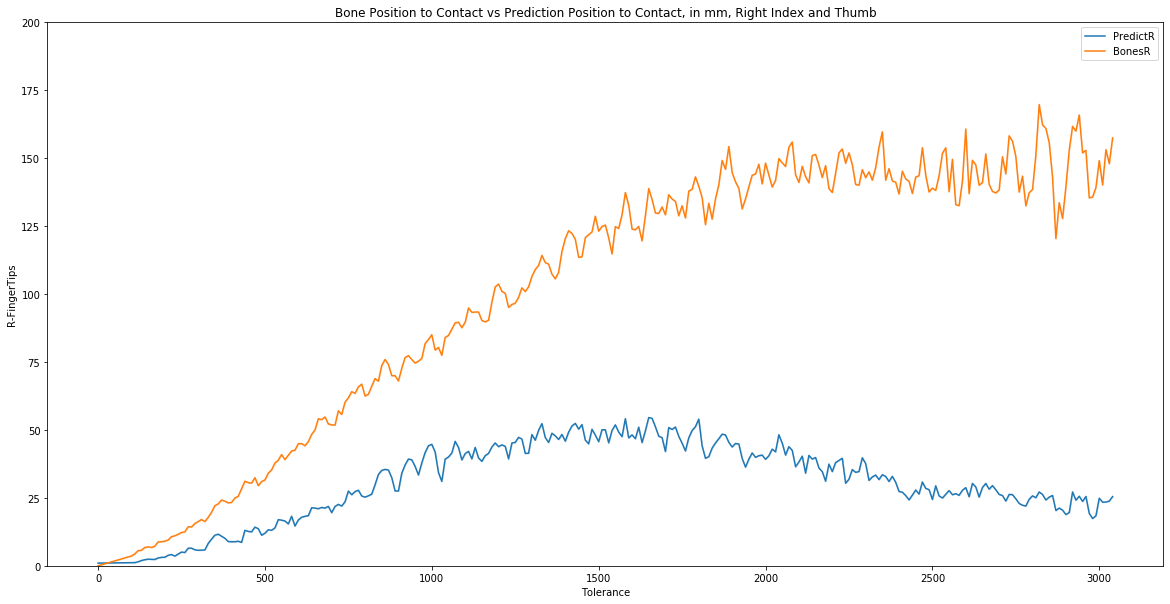

In [18]:
plt.figure(figsize = (20, 10))
#for user in range(0, nbUsers):
#    cond = (globalAnalysis['User'] == list_names[user])

sns.lineplot( x = 'Tolerance', y = 'R-FingerTips', data = globalAnalysis, label = 'PredictR')#+str(list_names[user]))
sns.lineplot( x = 'Tolerance', y = 'R-BonesFingerTips', data = globalAnalysis, label = 'BonesR')#+str(list_names[user]))

#sns.lineplot( x = 'Tolerance', y = 'L-FingerTips', data = globalAnalysis, label = 'PredictL')#+str(list_names[user]))
#sns.lineplot( x = 'Tolerance', y = 'L-BonesFingerTips', data = globalAnalysis, label = 'BonesL')#+str(list_names[user]))
plt.title('Bone Position to Contact vs Prediction Position to Contact, in mm, Right Index and Thumb')
plt.ylim(0,200)
plt.legend()

In [19]:
meanUsers.head()

Beta  BoneDist.6  BoneDist.9  Gamma  Phalanx.6  Phalanx.9    Speed.6  \
580  1.05   34.843155   49.659799    0.0  14.338129  22.114526  55.385777   
570  1.05   32.573199   48.834069    0.0  12.957408  17.856136  59.868898   
560  1.05   32.217109   45.961815    0.0  15.255877  17.722327  49.864988   
550  1.05   31.935119   49.930049    0.0  16.870618  16.735339   5.082500   
540  1.05   34.120988   43.630870    0.0  17.394004  16.567521  54.915500   

        Speed.9  
580   18.496223  
570  111.373797  
560   27.780639  
550    8.473225  
540   43.123515

In [20]:
analysisPerScale.index[:3300]

Int64Index([   0,  100,  110,  120,  130,  140,  150,  160,  170,  180,
            ...
            2950, 2960, 2970, 2980, 2990, 3000, 3010, 3020, 3030, 3040],
           dtype='int64', name='Tolerance', length=592)

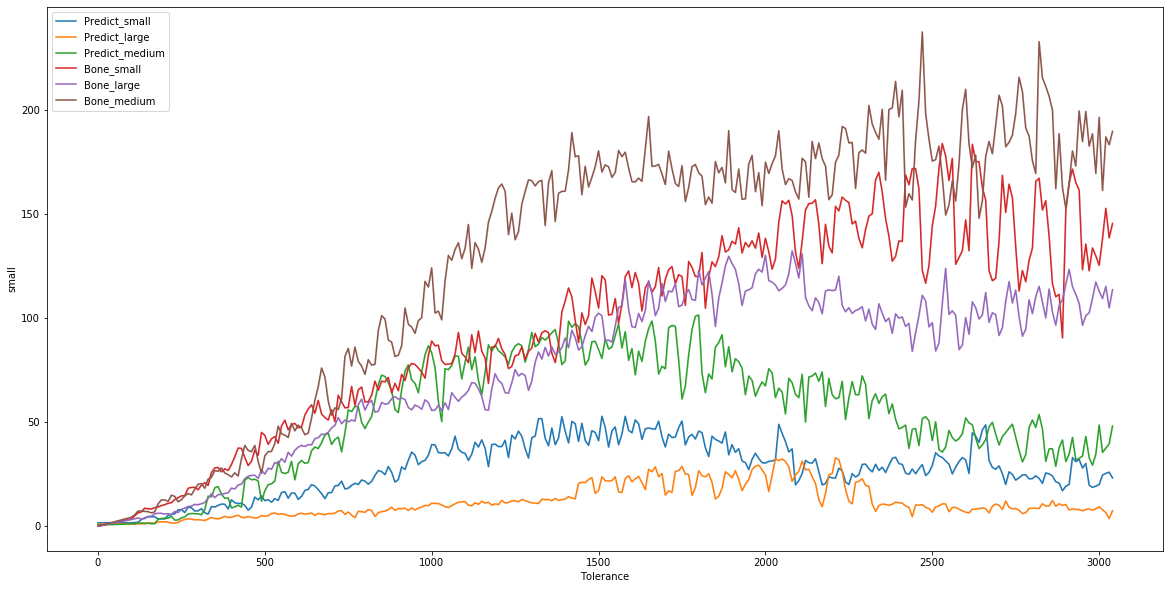

In [21]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'small', data = analysisPerScale[:3300], label = 'Predict_small')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'large', data = analysisPerScale[:3300], label = 'Predict_large')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'medium', data = analysisPerScale[:3300], label = 'Predict_medium')

alphaplot = sns.lineplot(x = 'Tolerance', y = 'small', data = analysisBoneDistPerScale[:3300], label = 'Bone_small')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'large', data = analysisBoneDistPerScale[:3300], label = 'Bone_large')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'medium', data = analysisBoneDistPerScale[:3300], label = 'Bone_medium')


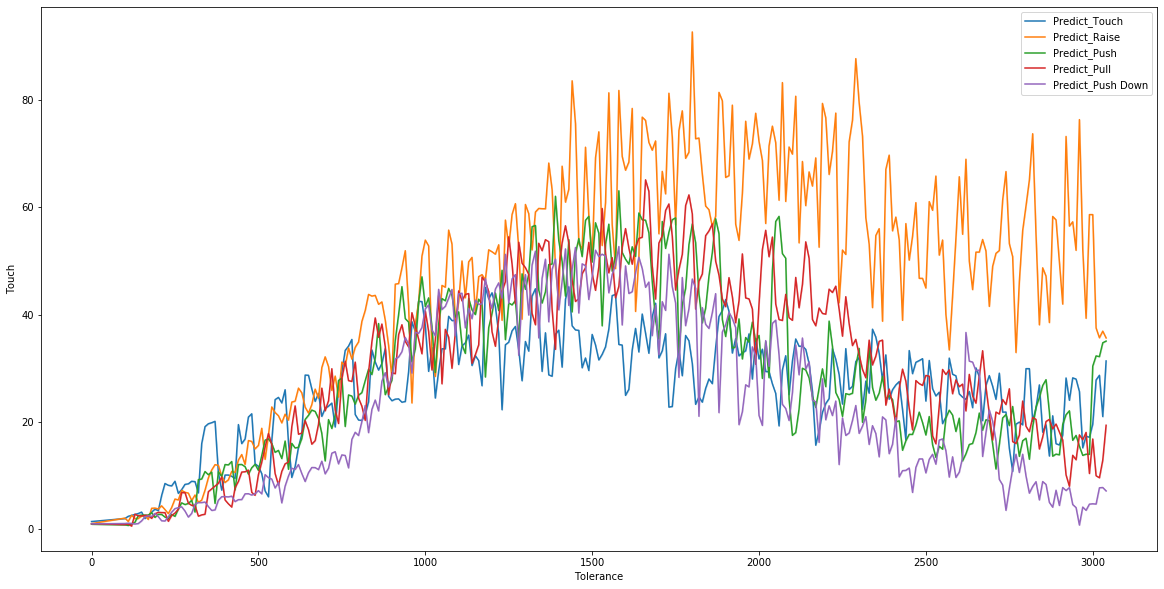

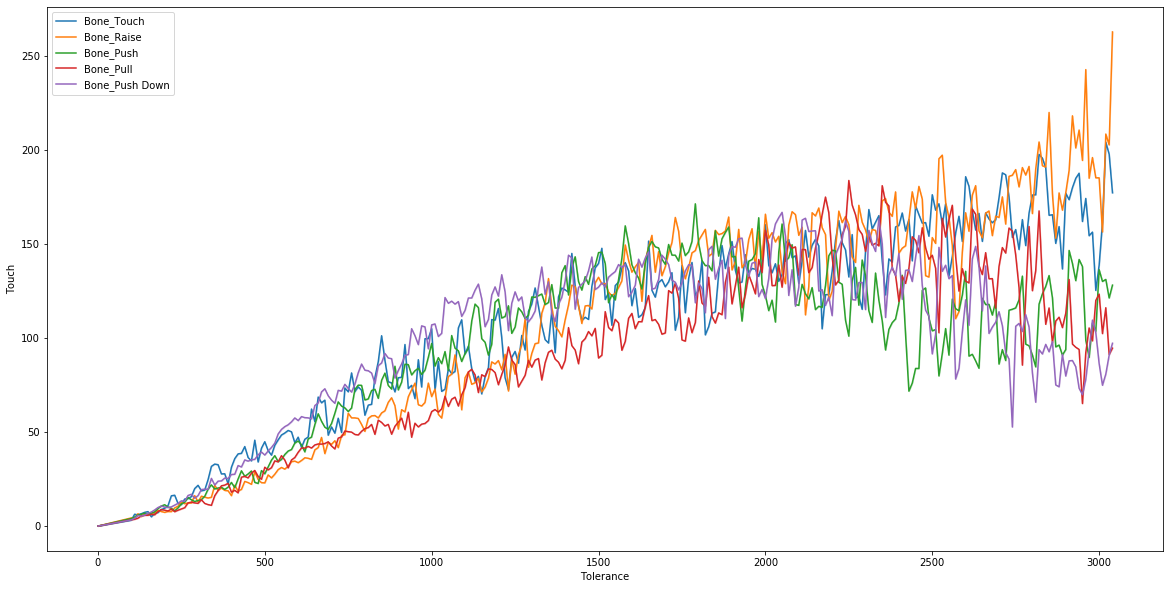

In [22]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisPerTask, label = 'Predict_Touch')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisPerTask, label = 'Predict_Raise')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisPerTask, label = 'Predict_Push')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisPerTask, label = 'Predict_Pull')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisPerTask, label = 'Predict_Push Down')

plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisBoneDistPerTask, label = 'Bone_Touch')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisBoneDistPerTask, label = 'Bone_Raise')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisBoneDistPerTask, label = 'Bone_Push')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisBoneDistPerTask, label = 'Bone_Pull')
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisBoneDistPerTask, label = 'Bone_Push Down')




In [23]:
allConfig.head()

Config  DistBoneInTolTime.0  DistBoneInTolTime.100  DistBoneInTolTime.1000  \
0       0                  0.0                1.02580                57.79045   
1       1                  0.0                7.49410                 8.41760   
2       2                  0.0                2.93300                27.62745   
3       3                  0.0                3.63005                61.80440   
4       4                  0.0                6.44150               144.20440   

   DistBoneInTolTime.1010  DistBoneInTolTime.1020  DistBoneInTolTime.1030  \
0                64.90725                64.90725               126.29510   
1                 8.41760                 8.41760                 6.20205   
2                27.62745                27.32670                27.32670   
3                44.55445                42.92010                42.92010   
4               122.18020               122.18020               122.18020   

   DistBoneInTolTime.1040  DistBoneInTolTime.1050  DistBoneInTolTime.1060  \
0                64.97170                64.97170                70.72980   
1                 6.20205                 6.20205                 6.20205   
2                20.42390                26.66550                26.66550   
3                42.92010                42.92010                43.90030   
4               122.18020               122.18020                91.60290   

   ...  Speed.920  Speed.930  Speed.940  Speed.950  Speed.960  Speed.970  \
0  ...        NaN        NaN        NaN        NaN        NaN        NaN   
1  ...        NaN    -69.393    -69.393    -69.393        NaN        NaN   
2  ...        NaN        NaN        NaN        NaN        NaN        NaN   
3  ...        NaN        NaN        NaN        NaN        NaN        NaN   
4  ...        NaN        NaN        NaN        NaN -43.469903 -43.469903   

   Speed.980  Speed.990       Task   User  
0        NaN        NaN      Touch  User3  
1        NaN        NaN      Raise  User3  
2        NaN        NaN       Pull  User3  
3        NaN        NaN       Push  User3  
4 -43.469903        NaN  Push Down  User3  

[5 rows x 1190 columns]

In [24]:
allConfig['DistInTolTime.0'] = allConfig['DistanceInTolTime.0']
allConfig.loc[allConfig['DistanceInTolTime.0'] <= 0, 'DistInTolTime.0'] = 0
#allConfig.loc[allConfig['DistanceInTolTime.0'] > 0, 'DistInTolTime.0'] = allConfig['DistanceInTolTime.0']
allConfig['AbsSpeed.0'] = abs(allConfig['Speed.0'])

for tol in range(100, 2050, 10):
    allConfig['DistInTolTime.'+str(tol)] = allConfig['DistanceInTolTime.'+str(tol)]
    allConfig.loc[allConfig['DistanceInTolTime.'+str(tol)] <= 0, 'DistInTolTime.'+str(tol)] = 0
    #allConfig.loc[allConfig['DistanceInTolTime.'+str(tol)] > 0, 'DistInTolTime.'+str(tol)] = allConfig['DistanceInTolTime.'+str(tol)]
    allConfig['AbsSpeed.'+str(tol)] = abs(allConfig['Speed.'+str(tol)])

In [25]:
speedTol = pd.DataFrame()
i = 0
speedTol.loc[0, 'AbsSpeed'] = allConfig['AbsSpeed.0'].dropna().mean()
for user in range(0, nbUsers):
    cond = allConfig['User'] == list_names[user]
    speedTol.loc[0, list_names[user]] = allConfig[cond]['AbsSpeed.0'].dropna().mean()
    for tol in range(300, 2050, 50):
        speedTol.loc[tol, 'AbsSpeed'] = allConfig['AbsSpeed.'+str(tol)].dropna().mean()
        speedTol.loc[tol, list_names[user]] = allConfig[cond]['AbsSpeed.'+str(tol)].dropna().mean()
    
    

In [26]:
speedTol

AbsSpeed       User3
0       6.646985    6.646985
300    62.271751   62.271751
350    41.114343   41.114343
400    30.978052   30.978052
450    27.522289   27.522289
500    53.408163   53.408163
550    24.486051   24.486051
600    49.101025   49.101025
650    30.465378   30.465378
700    77.946554   77.946554
750    48.413249   48.413249
800    19.224853   19.224853
850     1.540775    1.540775
900    69.502670   69.502670
950    25.838211   25.838211
1000  114.370476  114.370476
1050   50.653118   50.653118
1100    0.435621    0.435621
1150   41.770962   41.770962
1200   70.303221   70.303221
1250   49.026508   49.026508
1300   44.616788   44.616788
1350   29.839398   29.839398
1400    0.630525    0.630525
1450    6.730402    6.730402
1500    9.015141    9.015141
1550   93.432658   93.432658
1600   70.619755   70.619755
1650    0.008962    0.008962
1700   31.422896   31.422896
1750    0.094643    0.094643
1800   29.781340   29.781340
1850    0.000000    0.000000
1900   18.726113   18.726113
1950   13.977203   13.977203
2000    0.136490    0.136490

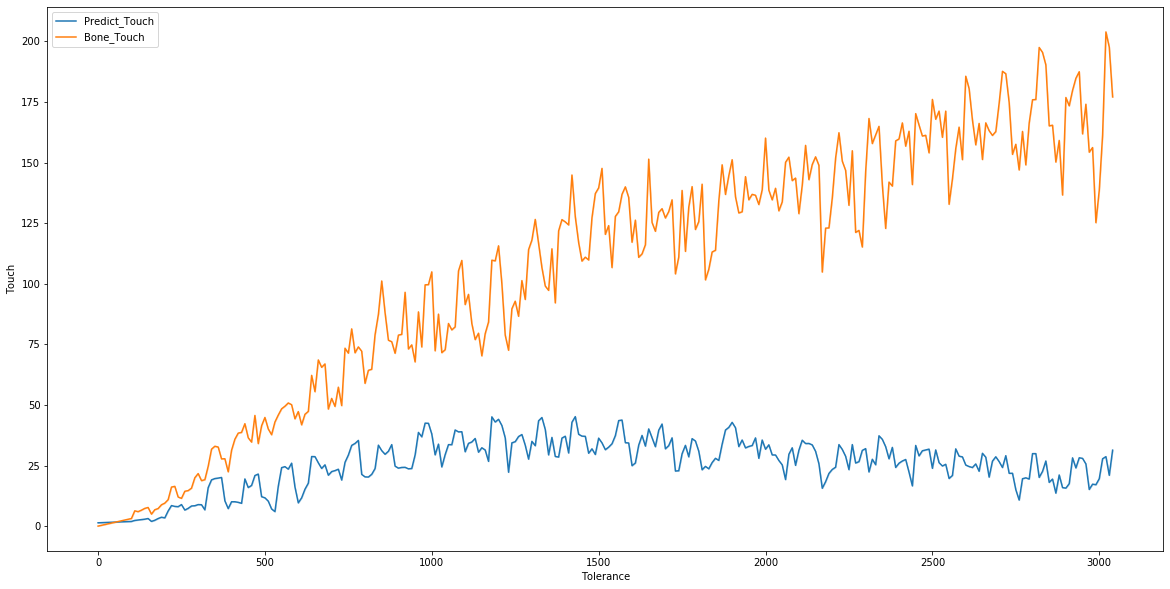

In [27]:
plt.figure(figsize=(20,10))
alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisPerTask, label = 'Predict_Touch')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisPerTask, label = 'Predict_Raise')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisPerTask, label = 'Predict_Push')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisPerTask, label = 'Predict_Pull')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisPerTask, label = 'Predict_Push Down')

alphaplot = sns.lineplot(x = 'Tolerance', y = 'Touch', data = analysisBoneDistPerTask, label = 'Bone_Touch')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Raise', data = analysisBoneDistPerTask, label = 'Bone_Raise')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push', data = analysisBoneDistPerTask, label = 'Bone_Push')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Pull', data = analysisBoneDistPerTask, label = 'Bone_Pull')
#alphaplot = sns.lineplot(x = 'Tolerance', y = 'Push Down', data = analysisBoneDistPerTask, label = 'Bone_Push Down')

#alphaplot = sns.lineplot(x = speedTol.index, y = 'AbsSpeed', data = speedTol, label = 'MeanSpeed')


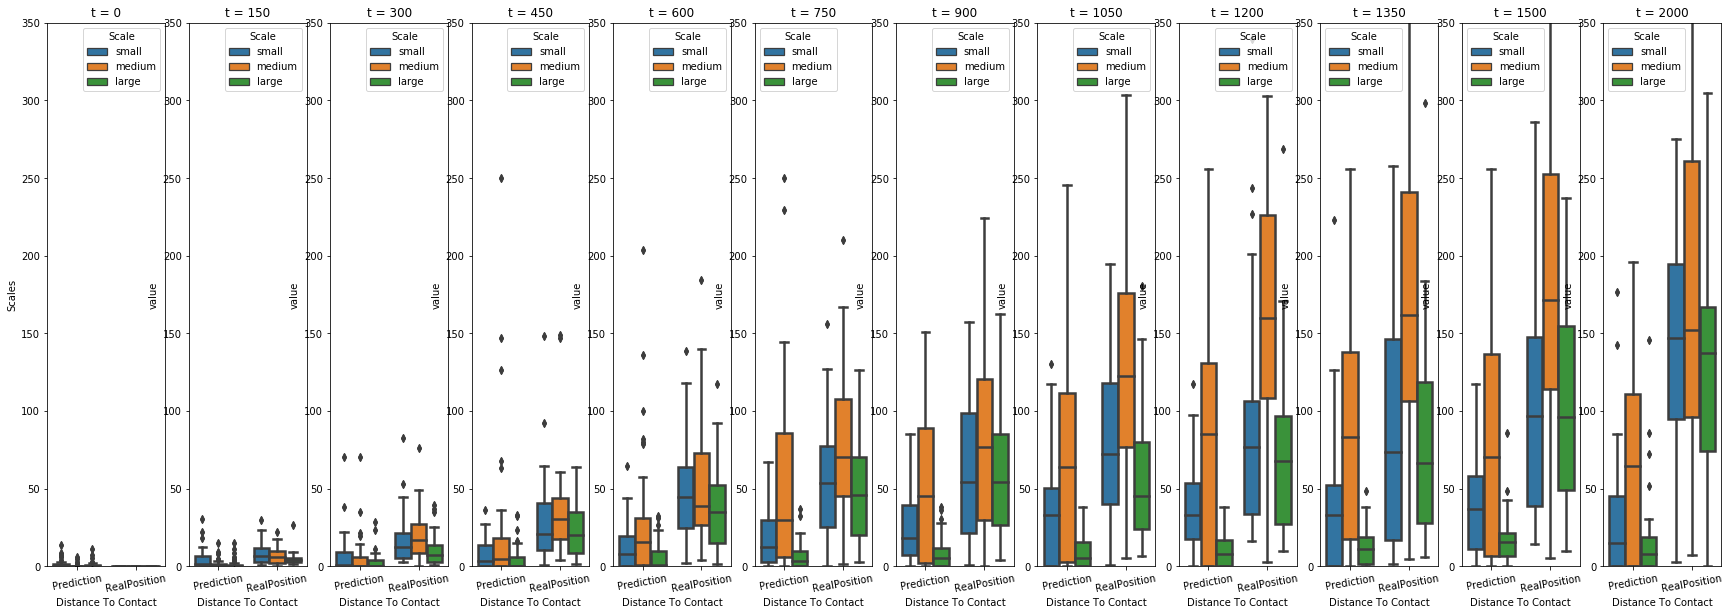

In [28]:
nameAx = []
nameFig = []
#tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]
tolTime = [0, 150, 300, 450, 600, 750, 900, 1050, 1200, 1350, 1500, 2000]
lim = [50, 150, 300, 300, 300, 300, 400, 400, 400, 500, 500, 500]
for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):

    mdf = pd.DataFrame()
    cdf = pd.DataFrame()
    df1 = pd.DataFrame()
    df2 = pd.DataFrame()
    df1 = pd.DataFrame(allConfig['DistInTolTime.'+str(tolTime[i])]).assign(Trial=1)
    df1['Scale'] = allConfig['Scale']
    df2 = pd.DataFrame(allConfig['DistBoneInTolTime.'+str(tolTime[i])]).assign(Trial=2)
    df2['DistInTolTime.'+str(tolTime[i])] = allConfig['DistBoneInTolTime.'+str(tolTime[i])]
    df2['Scale'] = allConfig['Scale']
    df2.assign(Trial=2)
    cdf = pd.concat([df1, df2], sort = False)                                # CONCATENATE
    mdf = pd.melt(cdf, id_vars=['Trial','Scale'],value_vars='DistInTolTime.'+str(tolTime[i]), var_name = 'DistInTolTime.'+str(tolTime[i]))

    nameFig[i] = sns.boxplot(x="Trial", y="value", hue = 'Scale', data=mdf, linewidth = 2.5, ax = nameAx[i])  # RUN PLOT   
    #nameFig[i] = sns.boxplot(x = "Scale", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])

    #, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    nameFig[i].set_xlabel('Distance To Contact')#, t ='+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    #nameFig[i].set_ylim(0, lim[i])
    
for ax in nameFig:
    tl = ['Prediction', 'RealPosition']#ax.get_xticklabels()#['Prediction/Contact', 'RealPosition/Contact'])
    ax.set_xticklabels(tl, rotation=10)
    ax.set_ylim(0, 350)


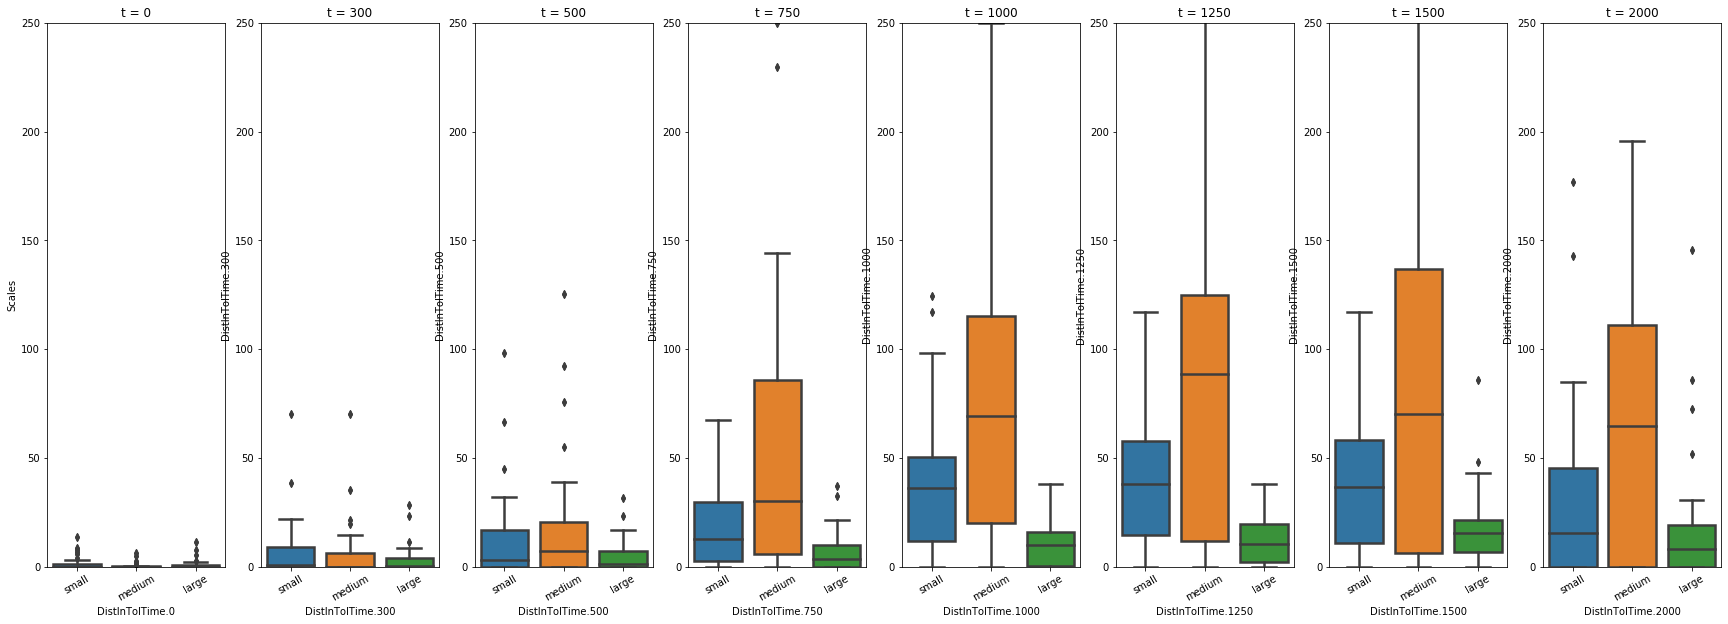

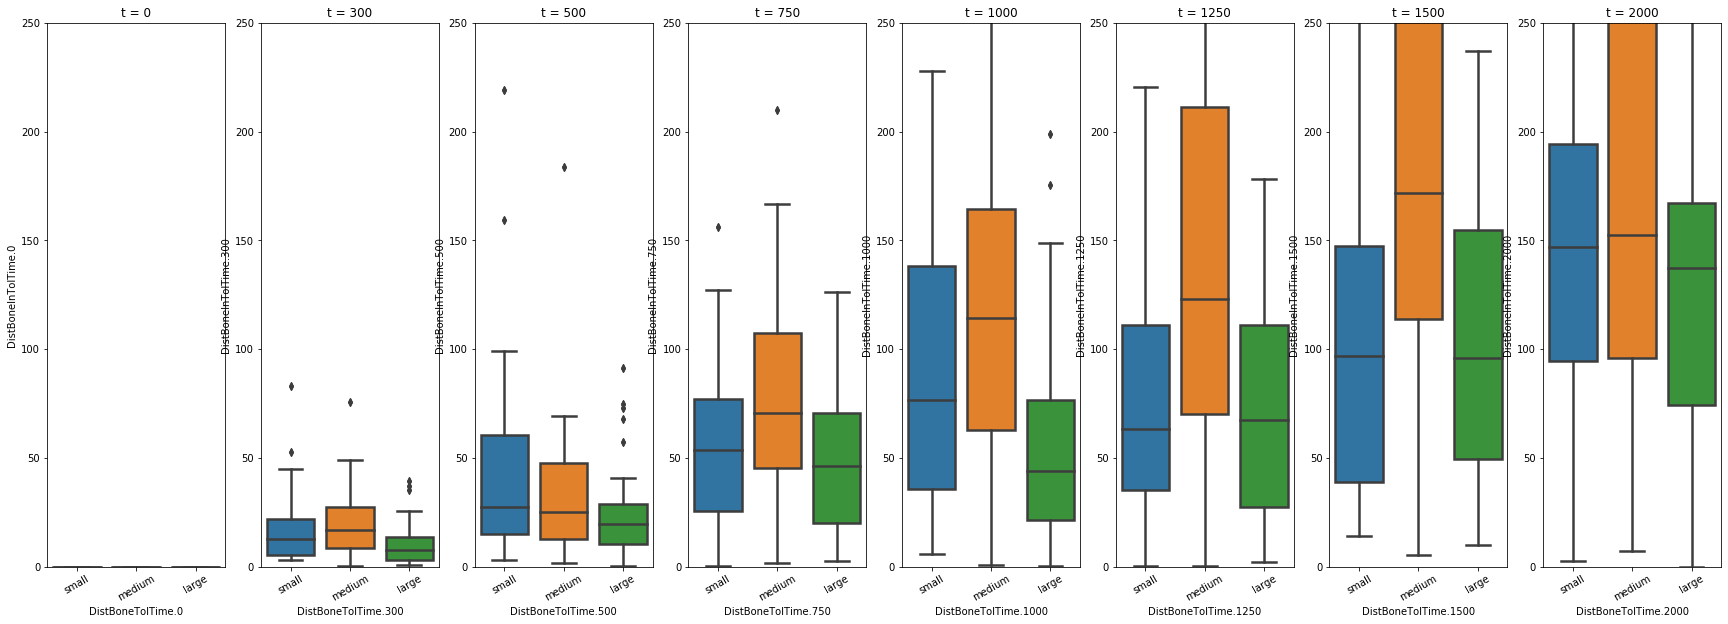

In [29]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Scale", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])

    #, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Scale", y = 'DistBoneInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    #nameFig[0].set_ylabel('Scales')
    nameFig[i].set_xlabel('DistBoneTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)


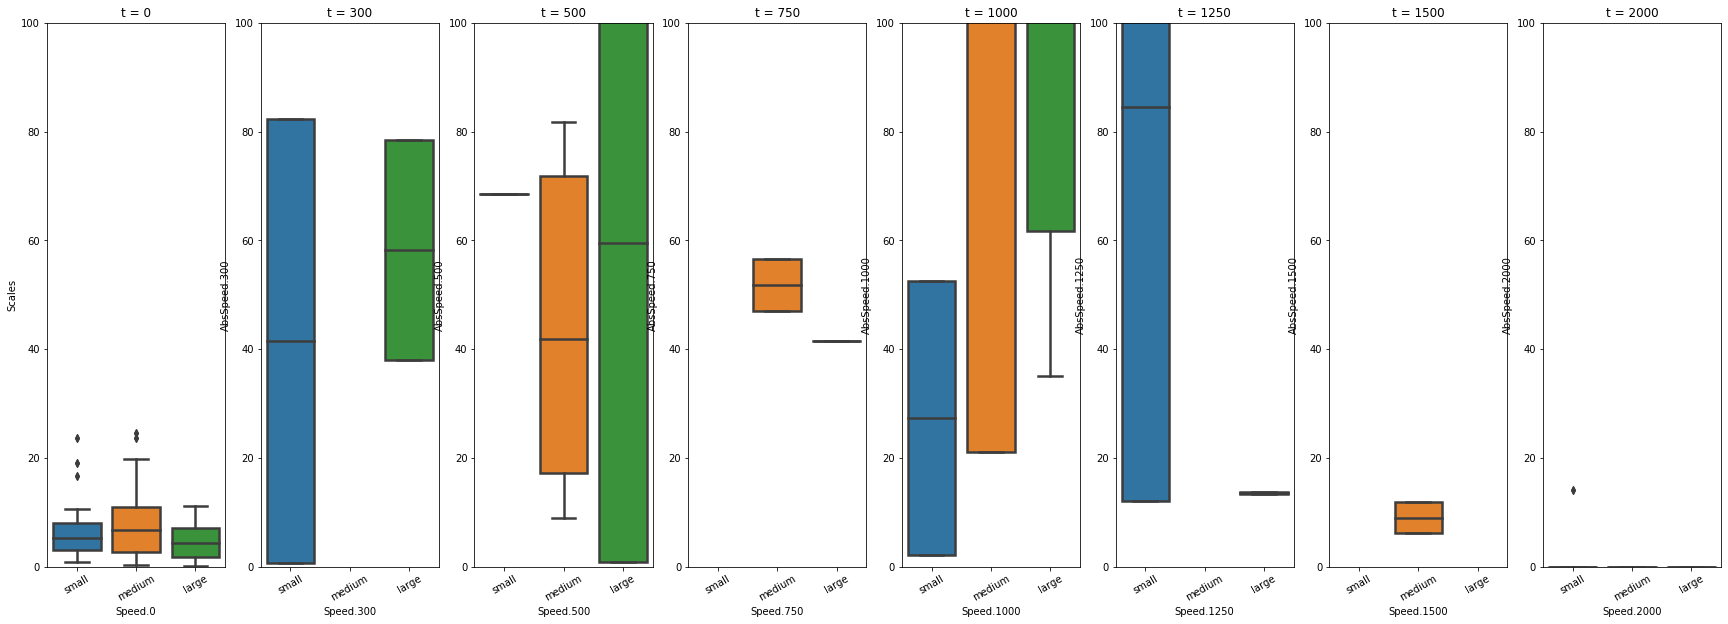

In [30]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Scale", y = 'AbsSpeed.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
    #nameFig[i] = sns.lineplot(x = i, y = 'AbsSpeed.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])

    
    #, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    nameFig[i].set_xlabel('Speed.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 100)

    

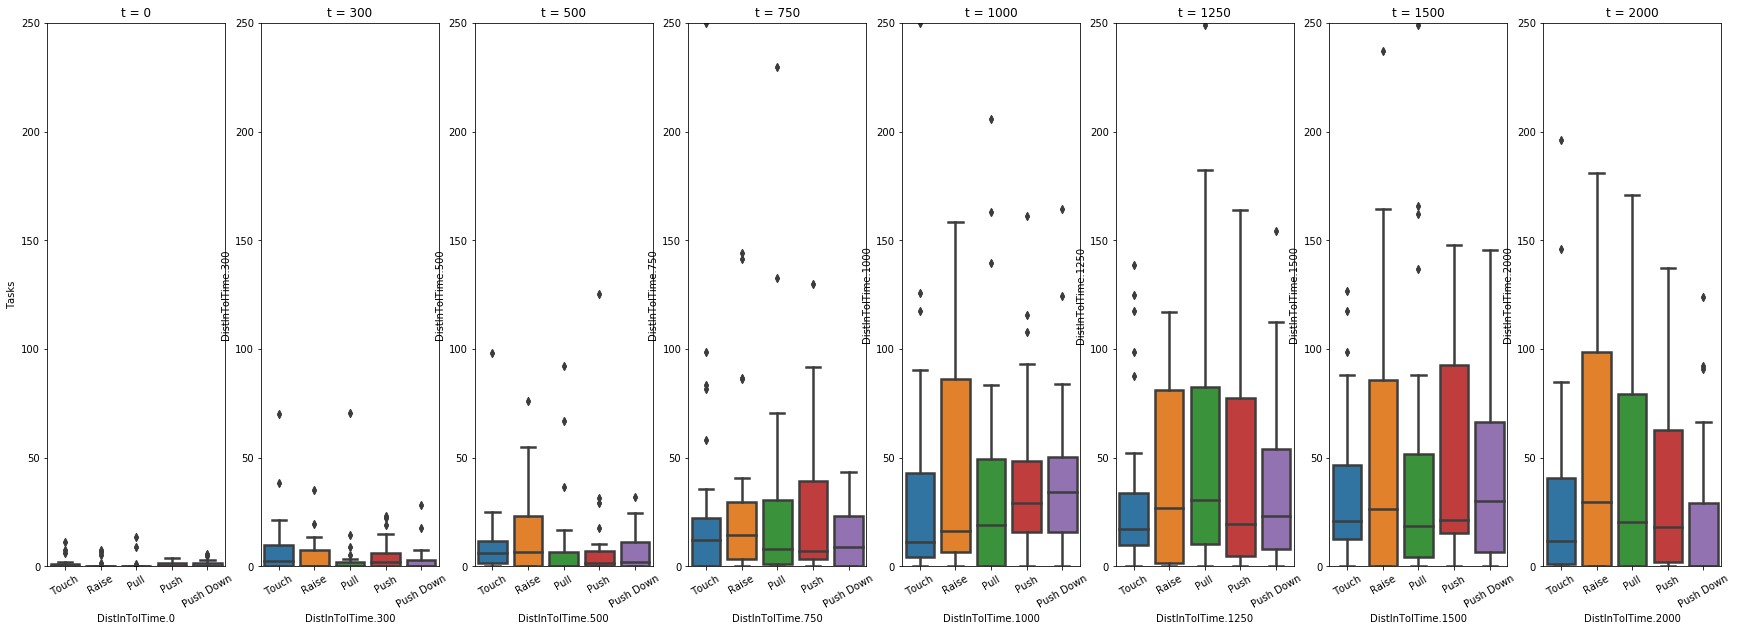

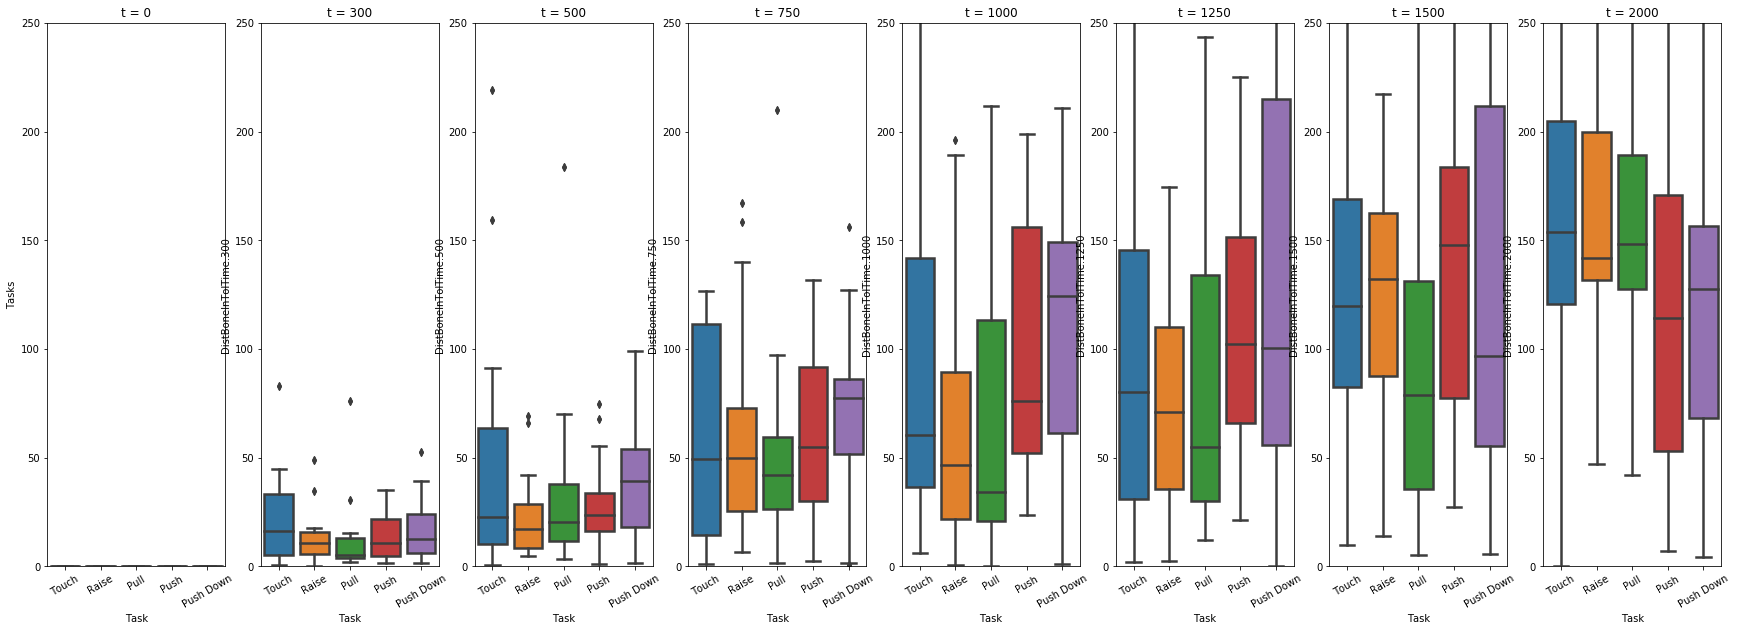

In [31]:
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Task", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Tasks')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)

    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Task", y = 'DistBoneInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Tasks')
    #nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)


In [32]:
allConfig['Obj'].iloc[77], allConfig['Scale'].iloc[77], allConfig['Task'].iloc[77]

('obj0', 'large', 'Raise')

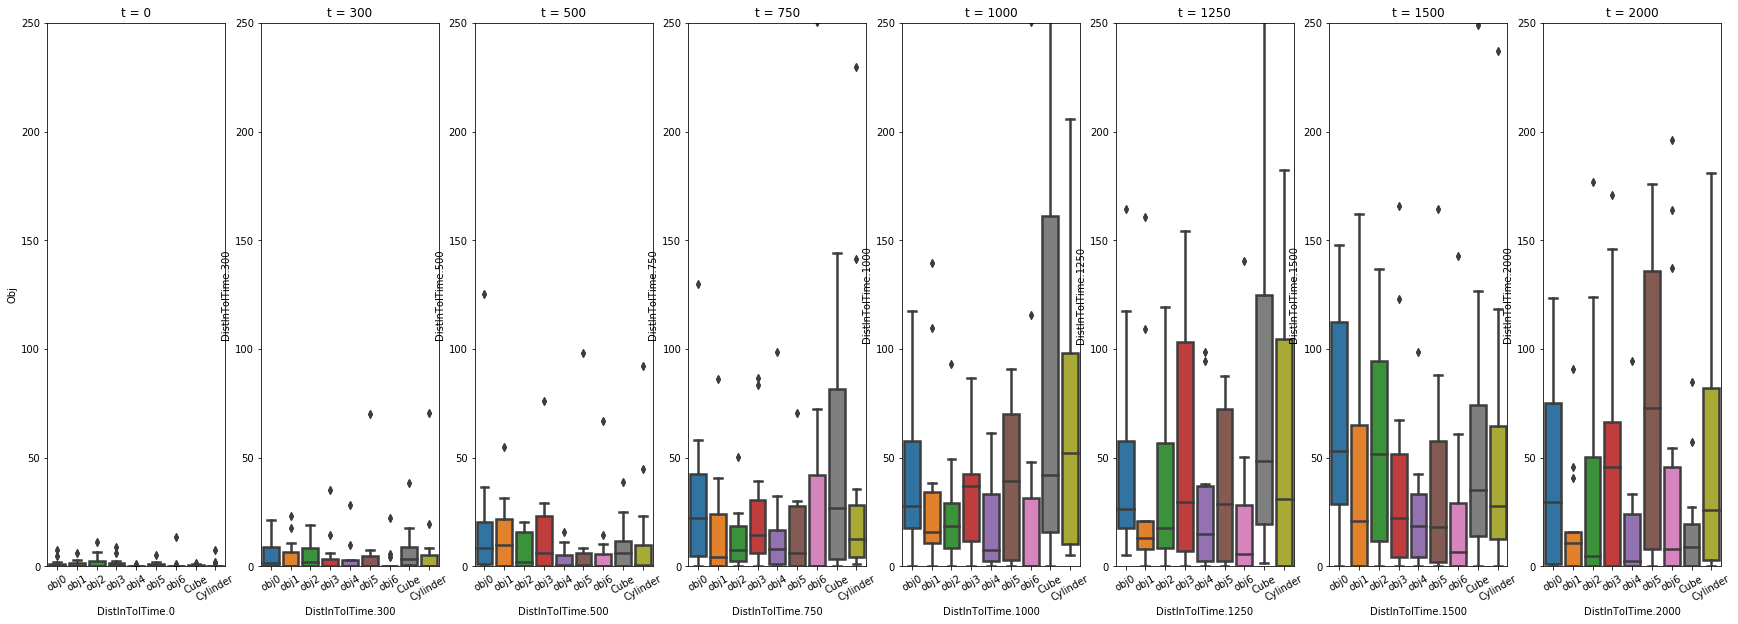

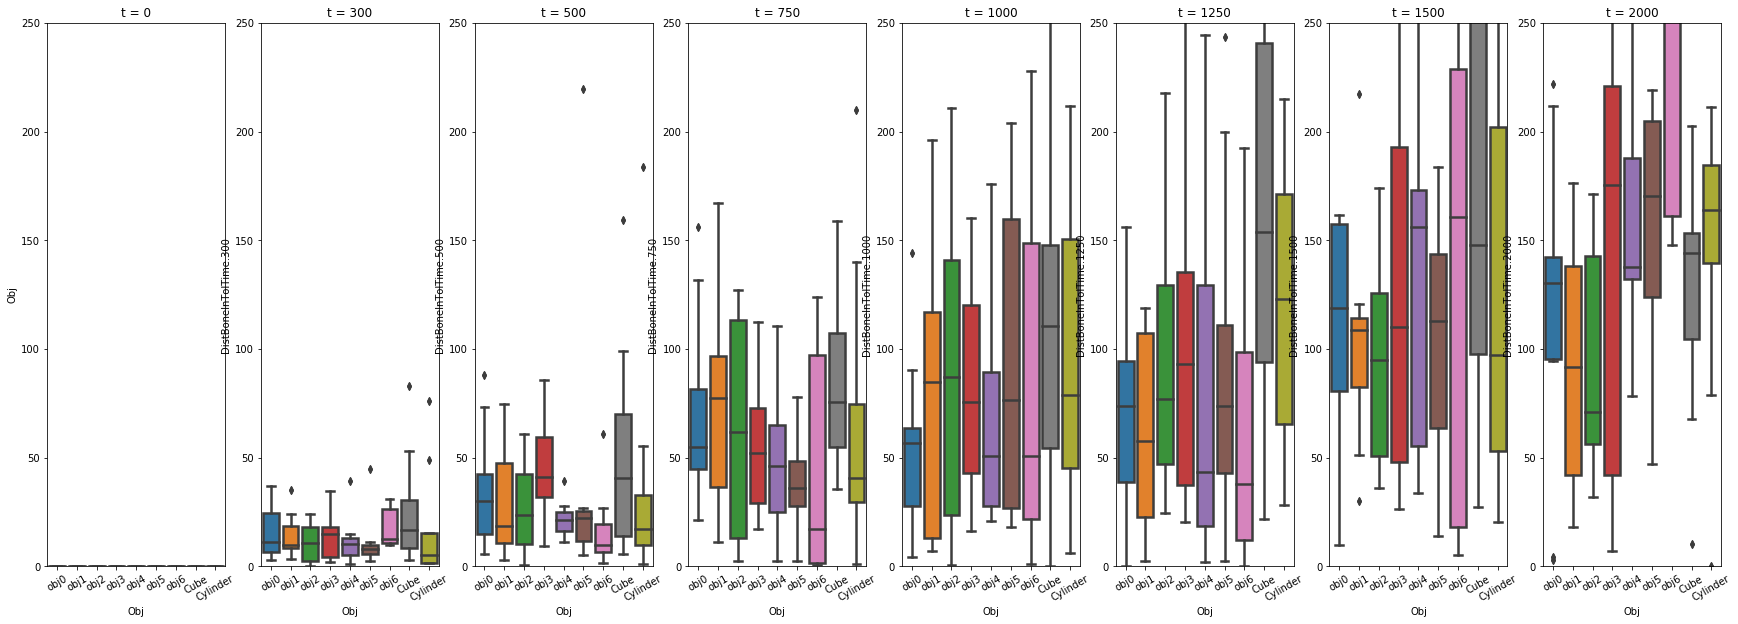

In [33]:
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))



for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Obj", y = 'DistInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Obj')
    nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)
    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

for i in range(0, len(tolTime)):
            
    nameFig[i] = sns.boxplot(x = "Obj", y = 'DistBoneInTolTime.'+str(tolTime[i]), data = allConfig, linewidth = 2.5, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Obj')
    #nameFig[i].set_xlabel('DistInTolTime.'+str(tolTime[i]))
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    ax.set_ylim(0, 250)


In [34]:
taskScale = pd.DataFrame()

tol = 300
for size in range(0, len(scales)):
    for gest in range (0, len(tasks)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
        
        
taskObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for gest in range (0, len(tasks)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
        
        
scaleObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for size in range (0, len(scales)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

        scaleObj.loc[scales[size], objects[obj]] = mean/nbUsers

In [35]:
taskObj

Touch      Raise       Pull       Push  Push Down
obj0      10.141649   6.676123   0.518098   4.422000   4.288464
obj1       5.931583   5.777316   0.000000  11.625699   0.846082
obj2       8.237818   5.078764   1.172066   9.071616   0.000000
obj3       2.108901  17.591724   4.803364   2.112817   1.569501
obj4       4.132265   0.000000   0.983149   0.964148  14.162646
obj5      35.147601   5.032531   0.192002   0.892202   0.000000
obj6       0.000000   0.000000   0.000000   9.217366   1.423768
Cube      17.196251   0.233448   3.566868   6.638598   6.954200
Cylinder   4.171347   6.512799  25.275167   0.564483   0.000000

In [36]:
taskScale

Touch     Raise      Pull      Push  Push Down
small   16.820495  4.695299  1.763956  8.627908   3.046521
medium   5.925750  9.664818  9.746693  2.998413   0.897938
large    3.224288  2.264589  1.030245  4.529810   4.674955

In [37]:
scaleObj

obj0      obj1      obj2       obj3      obj4       obj5  \
small   5.960278  5.040485  6.280500   2.377314  3.223683  25.408700   
medium  9.632037  2.734587  3.961508  10.546509  0.983149   0.538998   
large   0.626668  5.963210  3.894149   0.788975  6.595867   1.765182   

            obj6       Cube   Cylinder  
small   4.423670  19.940813   0.212830  
medium  0.000000   1.585039  22.632098  
large   1.961011   3.169240   2.761499

In [38]:

tol = 1250


for users in range(0, nbUsers):
    cond = (allConfig['Task'] == 'Raise') & (allConfig['Scale'] == 'medium') & (allConfig['User'] == list_names[users])            
    print(1250, 'raise', list_names[users], allConfig[cond]['DistInTolTime.'+str(tol)], allConfig[cond]['Obj'])
    
for users in range(0, nbUsers):
    cond = (allConfig['Scale'] == 'medium') & (allConfig['Obj'] == 'obj5') & (allConfig['User'] == list_names[users])            
    print(1250, 'obj5',list_names[users], allConfig[cond]['DistInTolTime.'+str(tol)], allConfig[cond]['Task'])
    
for users in range(0, nbUsers):
    cond = (allConfig['Scale'] == 'medium') & (allConfig['Obj'] == 'obj0') & (allConfig['User'] == list_names[users])            
    print(1250, 'obj0',list_names[users], allConfig[cond]['DistInTolTime.'+str(tol)], allConfig[cond]['Task'])

    
tol = 750


for users in range(0, nbUsers):
    cond = (allConfig['Task'] == 'Raise') & (allConfig['Scale'] == 'medium') & (allConfig['User'] == list_names[users])            
    print(750, 'raise', list_names[users], allConfig[cond]['DistInTolTime.'+str(tol)], allConfig[cond]['Obj'])
    
for users in range(0, nbUsers):
    cond = (allConfig['Scale'] == 'medium') & (allConfig['Obj'] == 'obj5') & (allConfig['User'] == list_names[users])            
    print(750, 'obj5',list_names[users], allConfig[cond]['DistInTolTime.'+str(tol)], allConfig[cond]['Task'])
    
for users in range(0, nbUsers):
    cond = (allConfig['Scale'] == 'medium') & (allConfig['Obj'] == 'obj0') & (allConfig['User'] == list_names[users])            
    print(750, 'obj0',list_names[users], allConfig[cond]['DistInTolTime.'+str(tol)], allConfig[cond]['Task'])

1250 raise User3 43     109.034647
47       0.000000
52     116.925799
59       0.000000
63       0.000000
68     364.649649
72      92.570797
127           NaN
129           NaN
43     109.034647
47       0.000000
52     116.925799
59       0.000000
63       0.000000
68     364.649649
72      92.570797
127           NaN
129           NaN
Name: DistInTolTime.1250, dtype: float64 43         obj1
47         obj2
52         obj3
59         obj5
63         obj6
68         Cube
72     Cylinder
127        obj0
129        obj4
43         obj1
47         obj2
52         obj3
59         obj5
63         obj6
68         Cube
72     Cylinder
127        obj0
129        obj4
Name: Obj, dtype: object
1250 raise User3 43     109.034647
47       0.000000
52     116.925799
59       0.000000
63       0.000000
68     364.649649
72      92.570797
127           NaN
129           NaN
43     109.034647
47       0.000000
52     116.925799
59       0.000000
63       0.000000
68     364.649649
72      92.570797


In [39]:
who = 56

allConfig[allConfig.index == who]['Obj'], allConfig[allConfig.index == who]['Task'], allConfig[allConfig.index == who]['Scale']

(56    obj4
 56    obj4
 Name: Obj, dtype: object, 56    Touch
 56    Touch
 Name: Task, dtype: object, 56    medium
 56    medium
 Name: Scale, dtype: object)

# Scales and Tasks

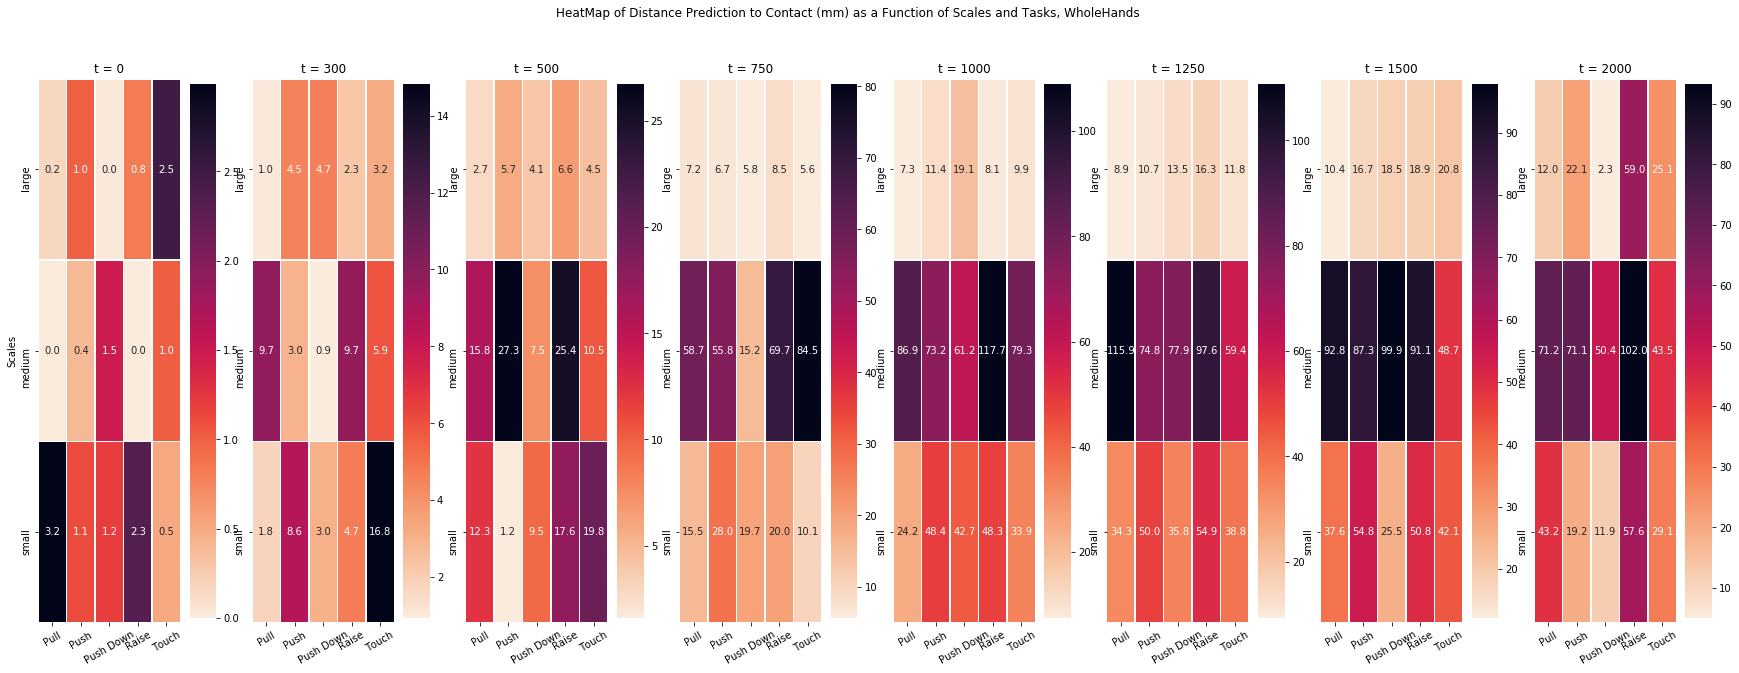

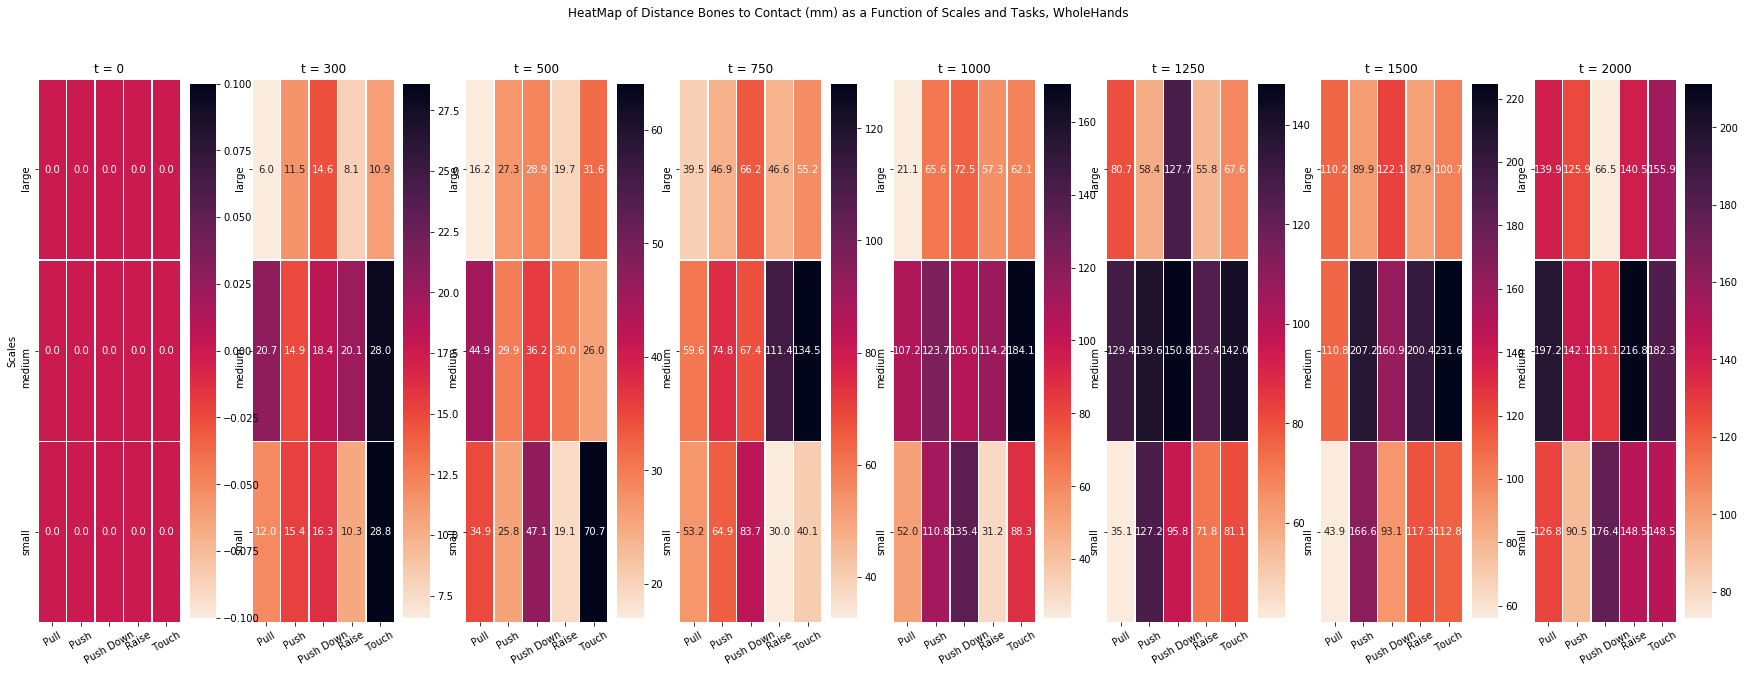

In [40]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]
#tolTime = [0, 100, 200, 300, 400, 500, 600, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskScale = pd.DataFrame()

    tol = tolTime[i]
    for size in range(0, len(scales)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Scales and Tasks, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    taskScale = pd.DataFrame()

    tol = tolTime[i]
    for size in range(0, len(scales)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            taskScale.loc[scales[size], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskScale.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Scales')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Scales and Tasks, WholeHands')

plt.show()

In [41]:

tol = 300
scaleObj = pd.DataFrame()        
for obj in range(0, len(objects)):
    for size in range (0, len(scales)):
        #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
        mean = 0
        for users in range(0, nbUsers):
            cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == 'obj6') & (allConfig['User'] == list_names[users])            
            mean += allConfig[cond]['DistInTolTime.'+str(tol)]
            

# Scales and Objects

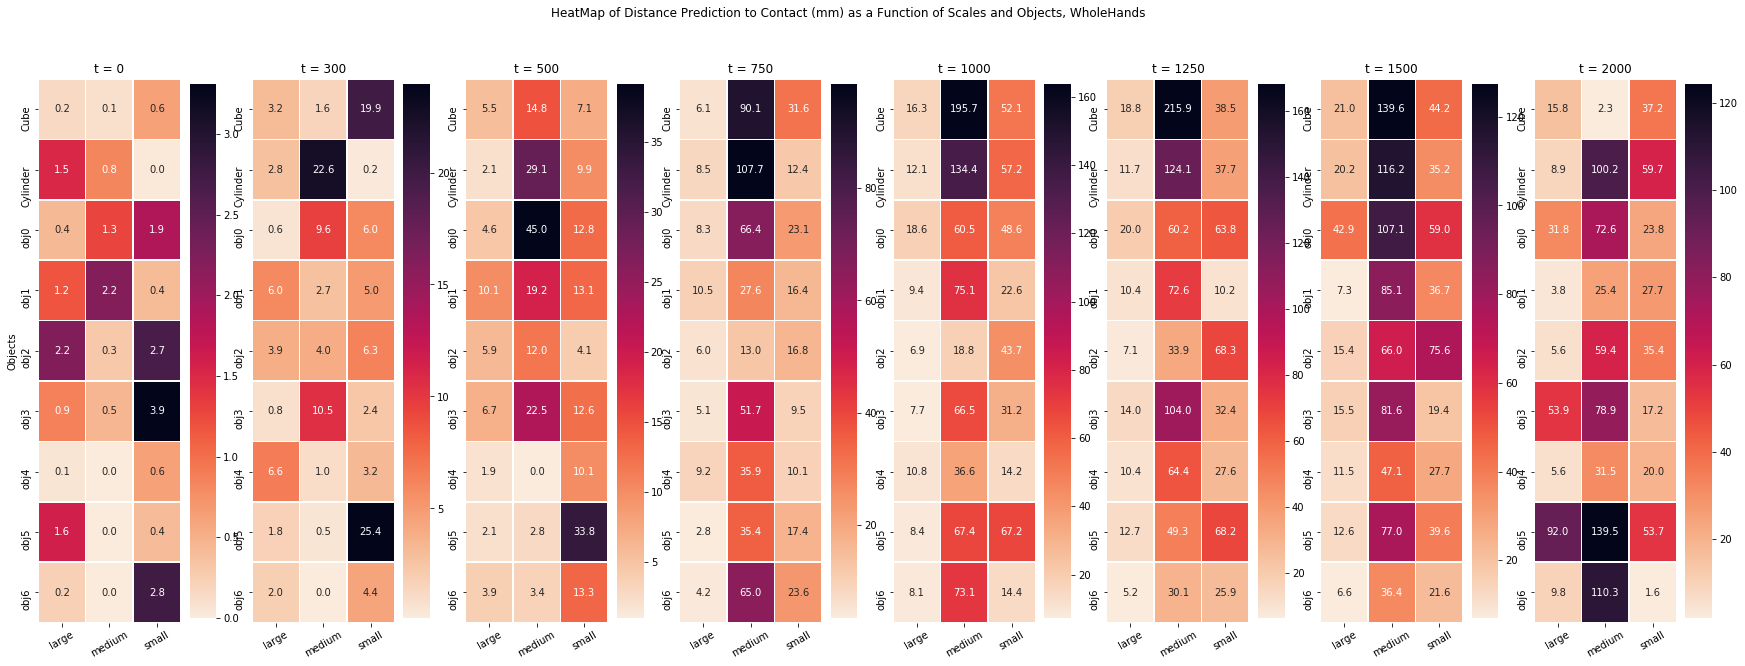

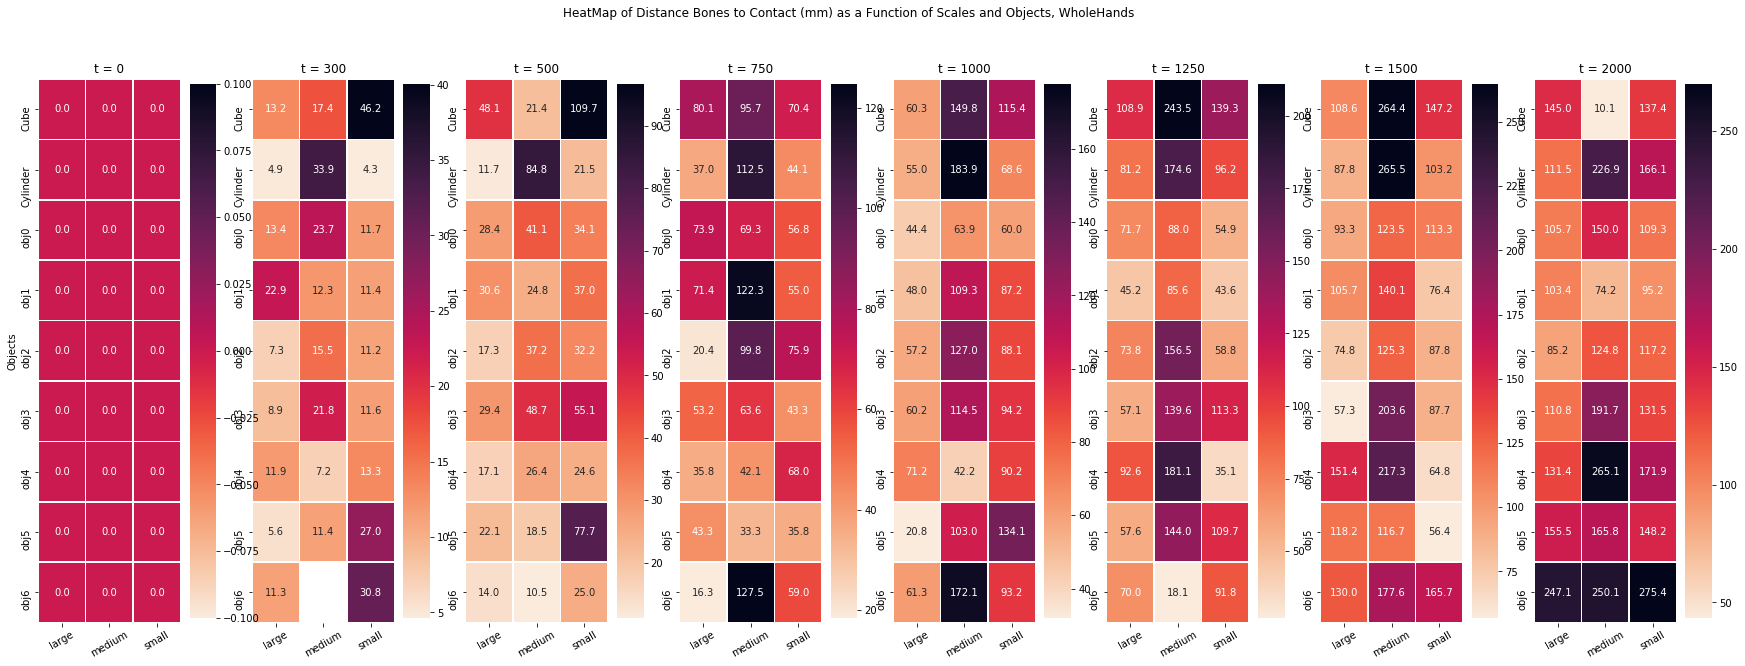

In [42]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    tol = tolTime[i]
    scaleObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for size in range (0, len(scales)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            scaleObj.loc[objects[obj], scales[size]] = mean/nbUsers        
            
    nameFig[i] = sns.heatmap(scaleObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Scales and Objects, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    tol = tolTime[i]

    scaleObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for size in range (0, len(scales)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Scale'] == scales[size]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            scaleObj.loc[objects[obj], scales[size]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(scaleObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Scales and Objects, WholeHands')

plt.show()

# Tasks and Objects

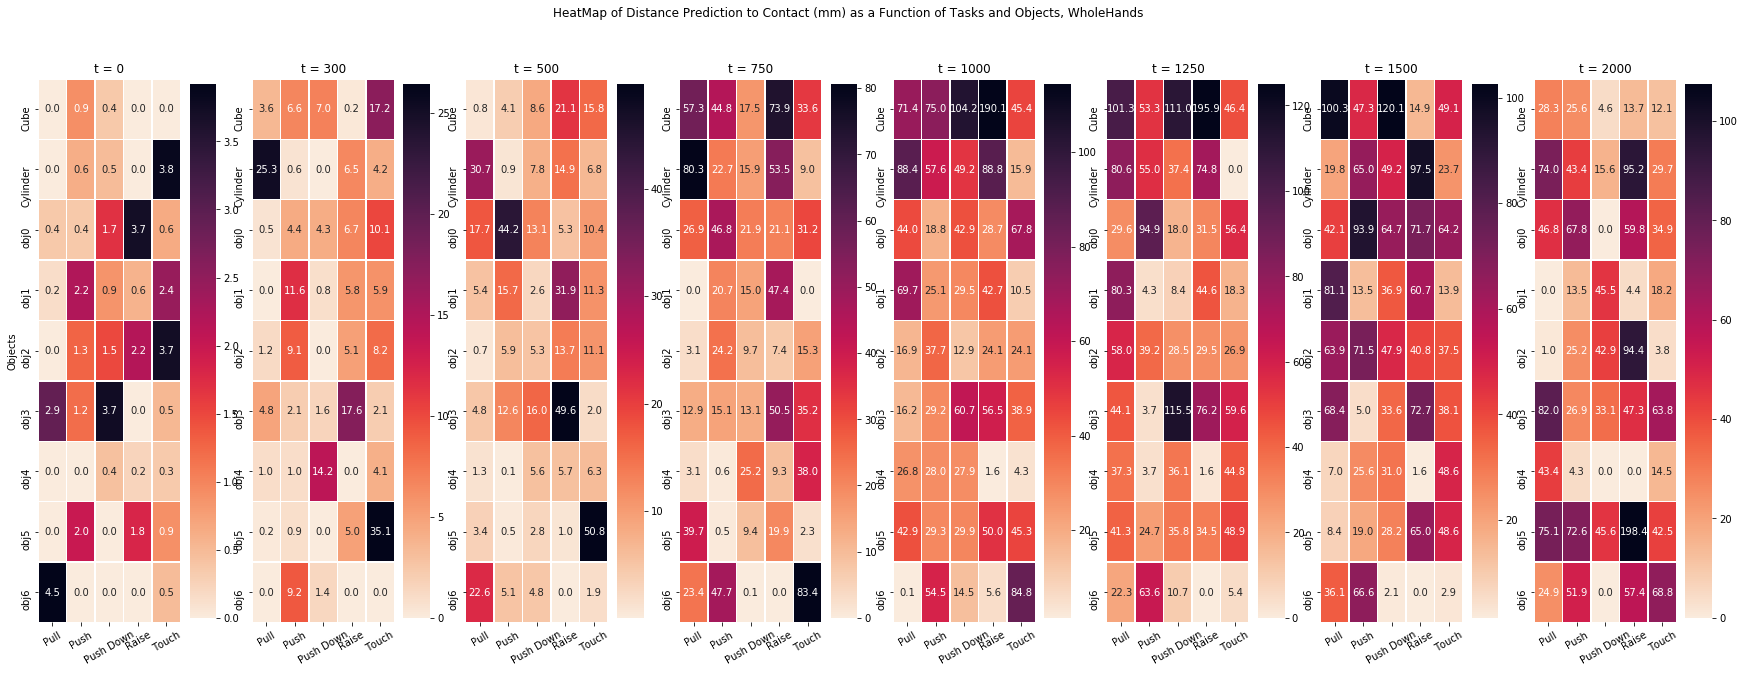

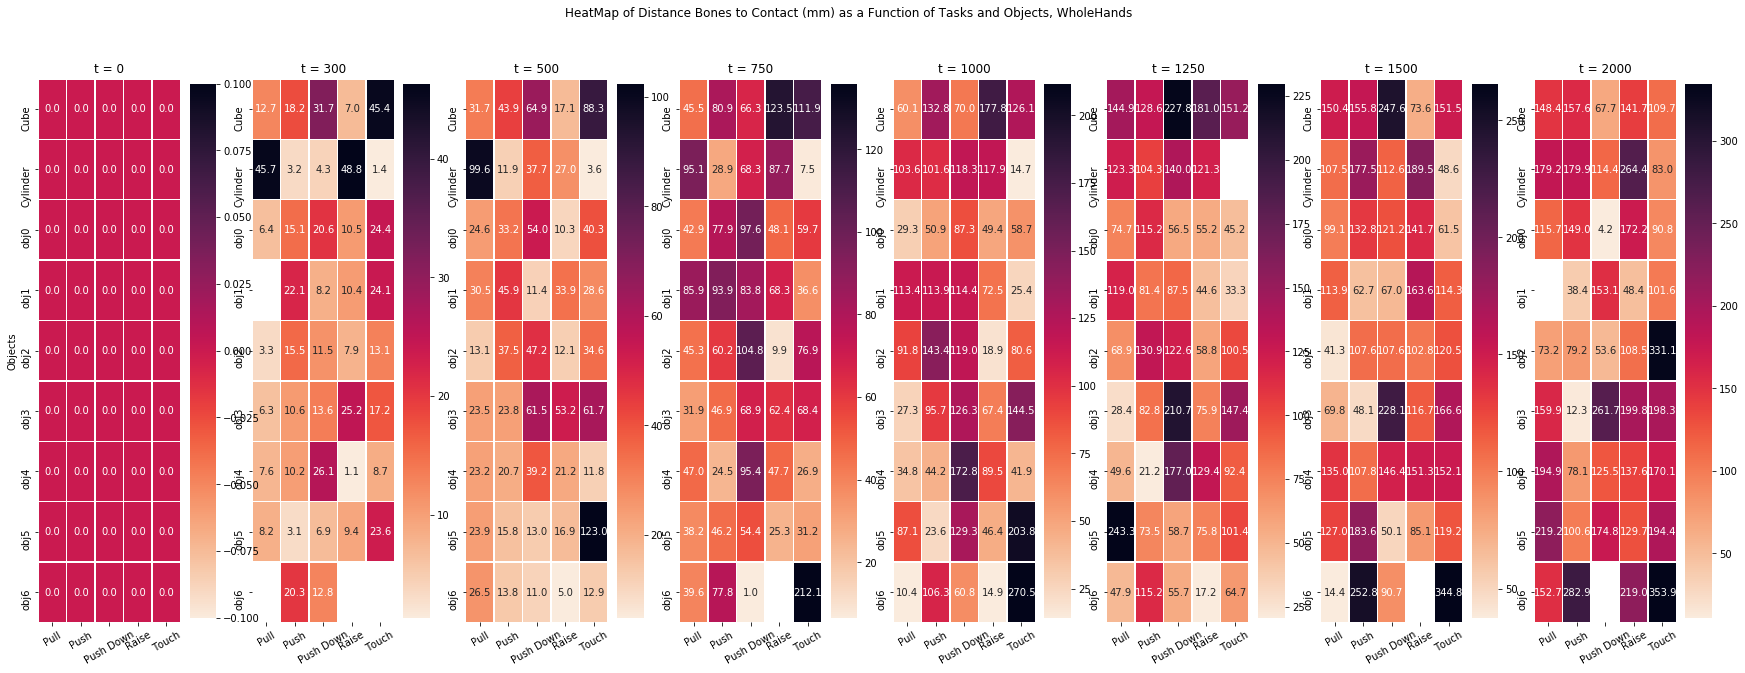

In [43]:
nameAx = []
nameFig = []
tolTime = [0, 300, 500, 750, 1000, 1250, 1500, 2000]

for i in range(0, len(tolTime)):
    nameAx.append('ax'+str(i))
    nameFig.append('g'+str(i))
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))

cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    
    tol = tolTime[i]
    taskObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistInTolTime.'+str(tol)].mean()

            taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)
    
f.suptitle('HeatMap of Distance Prediction to Contact (mm) as a Function of Tasks and Objects, WholeHands')    
    
f, nameAx = plt.subplots(1,len(nameAx), figsize=(30,10))
cmap = sns.cm.rocket_r


for i in range(0, len(tolTime)):
    tol = tolTime[i]

    taskObj = pd.DataFrame()        
    for obj in range(0, len(objects)):
        for gest in range (0, len(tasks)):
            #cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Scale'] == scales[size])
            mean = 0
            for users in range(0, nbUsers):
                cond = (allConfig['Task'] == tasks[gest]) & (allConfig['Obj'] == objects[obj]) & (allConfig['User'] == list_names[users])            
                mean += allConfig[cond]['DistBoneInTolTime.'+str(tol)].mean()

            taskObj.loc[objects[obj], tasks[gest]] = mean/nbUsers
            
    nameFig[i] = sns.heatmap(taskObj.sort_index(ascending = True).sort_index(axis = 1, ascending = True), annot = True, linewidths = .5, fmt = '.1f',
                 cmap = cmap, robust = True, square = False, ax = nameAx[i])
#, cbar_kws = {'label' : 'Distance To Prediction (mm)'})
    nameFig[0].set_ylabel('Objects')
    #nameFig[i].set_xlabel('Scales')
    nameAx[i].title.set_text('t = '+str(tolTime[i]))      
    
for ax in nameFig:
    tl = ax.get_xticklabels()
    ax.set_xticklabels(tl, rotation=30)

f.suptitle('HeatMap of Distance Bones to Contact (mm) as a Function of Tasks and Objects, WholeHands')

plt.show()